<hr>

# **Problem Statement**

**Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.**

**Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.**

<hr>

# **Elements of the dataset**

**About People**

* `ID`: Customer's unique identifier
* `Year_Birth`: Customer's birth year
* `Education`: Customer's education level
* `Marital_Status`: Customer's marital status
* `Income`: Customer's yearly household income
* `Kidhome`: Number of children in customer's household
* `Teenhome`: Number of teenagers in customer's household
* `Dt_Customer`: Date of customer's enrollment with the company
* `Recency`: Number of days since customer's last purchase
* `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

* `MntWines`: Amount spent on wine in last 2 years
* `MntFruits`: Amount spent on fruits in last 2 years
* `MntMeatProducts`: Amount spent on meat in last 2 years
* `MntFishProducts`: Amount spent on fish in last 2 years
* `MntSweetProducts`: Amount spent on sweets in last 2 years
* `MntGoldProds`: Amount spent on gold in last 2 years

**Promotion**

* `NumDealsPurchases`: Number of purchases made with a discount
* `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place

* `NumWebPurchases`: Number of purchases made through the company’s website
* `NumCatalogPurchases`: Number of purchases made using a catalogue
* `NumStorePurchases`: Number of purchases made directly in stores
* `NumWebVisitsMonth`: Number of visits to company’s website in the last month

<hr>

# **Target**

**Need to perform clustering to summarize customer segments.**

<hr>

# **Agenda**

**Here using the techniques like EDA, Data Visualization and other methods, we will explore the data. Then using the PCA we will implement the dimensionality reduction here and then we will use clustering based on K-Mean**

<hr>

# **Step 1: Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

<hr>

# **Step 2: Data Loading**

In [ ]:
df = pd.read_csv('/content/marketing_campaign.csv', sep = '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


<hr>

# **Step 3: Data Inspection**

**Firstly let's calculate the shape, in order see how many data records we are having with our datasets**

In [ ]:
a = df.shape
print(f'The data is having {a[0]} rows and {a[1]} columns')

The data is having 2240 rows and 29 columns


**Data Overview**

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


**Insights**

* Education, Marital_Status are two categorical columns as seen and others are the numnerical columns

**Getting a brief on the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Insights:**
* It could be said that there are no null values present in the dataset in any of the columns else than the income columns

* There are only three categorical column in the dataset (proving the above statement / insight).

* Rest all the columns are numerical columns



 <hr>

 # **Statistical Summary**

In [ ]:
corr = df.describe().T
corr.style.background_gradient(cmap = 'Pastel1')


,count,mean,std,min,25%,50%,75%,max
ID,2240.000000,5592.159821,3246.662198,0.000000,2828.250000,5458.500000,8427.750000,11191.000000
Year_Birth,2240.000000,1968.805804,11.984069,1893.000000,1959.000000,1970.000000,1977.000000,1996.000000
Income,2216.000000,52247.251354,25173.076661,1730.000000,35303.000000,51381.500000,68522.000000,666666.000000
Kidhome,2240.000000,0.444196,0.538398,0.000000,0.000000,0.000000,1.000000,2.000000
Teenhome,2240.000000,0.506250,0.544538,0.000000,0.000000,0.000000,1.000000,2.000000
Recency,2240.000000,49.109375,28.962453,0.000000,24.000000,49.000000,74.000000,99.000000
MntWines,2240.000000,303.935714,336.597393,0.000000,23.750000,173.500000,504.250000,1493.000000
MntFruits,2240.000000,26.302232,39.773434,0.000000,1.000000,8.000000,33.000000,199.000000
MntMeatProducts,2240.000000,166.950000,225.715373,0.000000,16.000000,67.000000,232.000000,1725.000000
MntFishProducts,2240.000000,37.525446,54.628979,0.000000,3.000000,12.000000,50.000000,259.000000


**Insights**


* **The average income of the dataset is 52247 the least is 1730 and the maximum is $666666**
* **The average child is 0.44 the min is 0 and the maximum number of childrens are 2 in a household**
* **Similarily we can derieve a lot of insights from here**

<hr>

# **Inspecting all the columns based on their datatypes**

In [ ]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

**Insight:**

**As confirmed in the above insight will getting a brief on the data, there are in total three categorical data columns**
  * Education
  * Marital-status
  * Dt_customer

**All the other columns are numerical columns**

**(_After analysis we can perform the feature encoding on the categorical data_)**

<hr>

# **Step 4: Data Preparation**

**Analysing the Missing values in the dataset**

In [ ]:
# checking the missing data
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<Axes: >

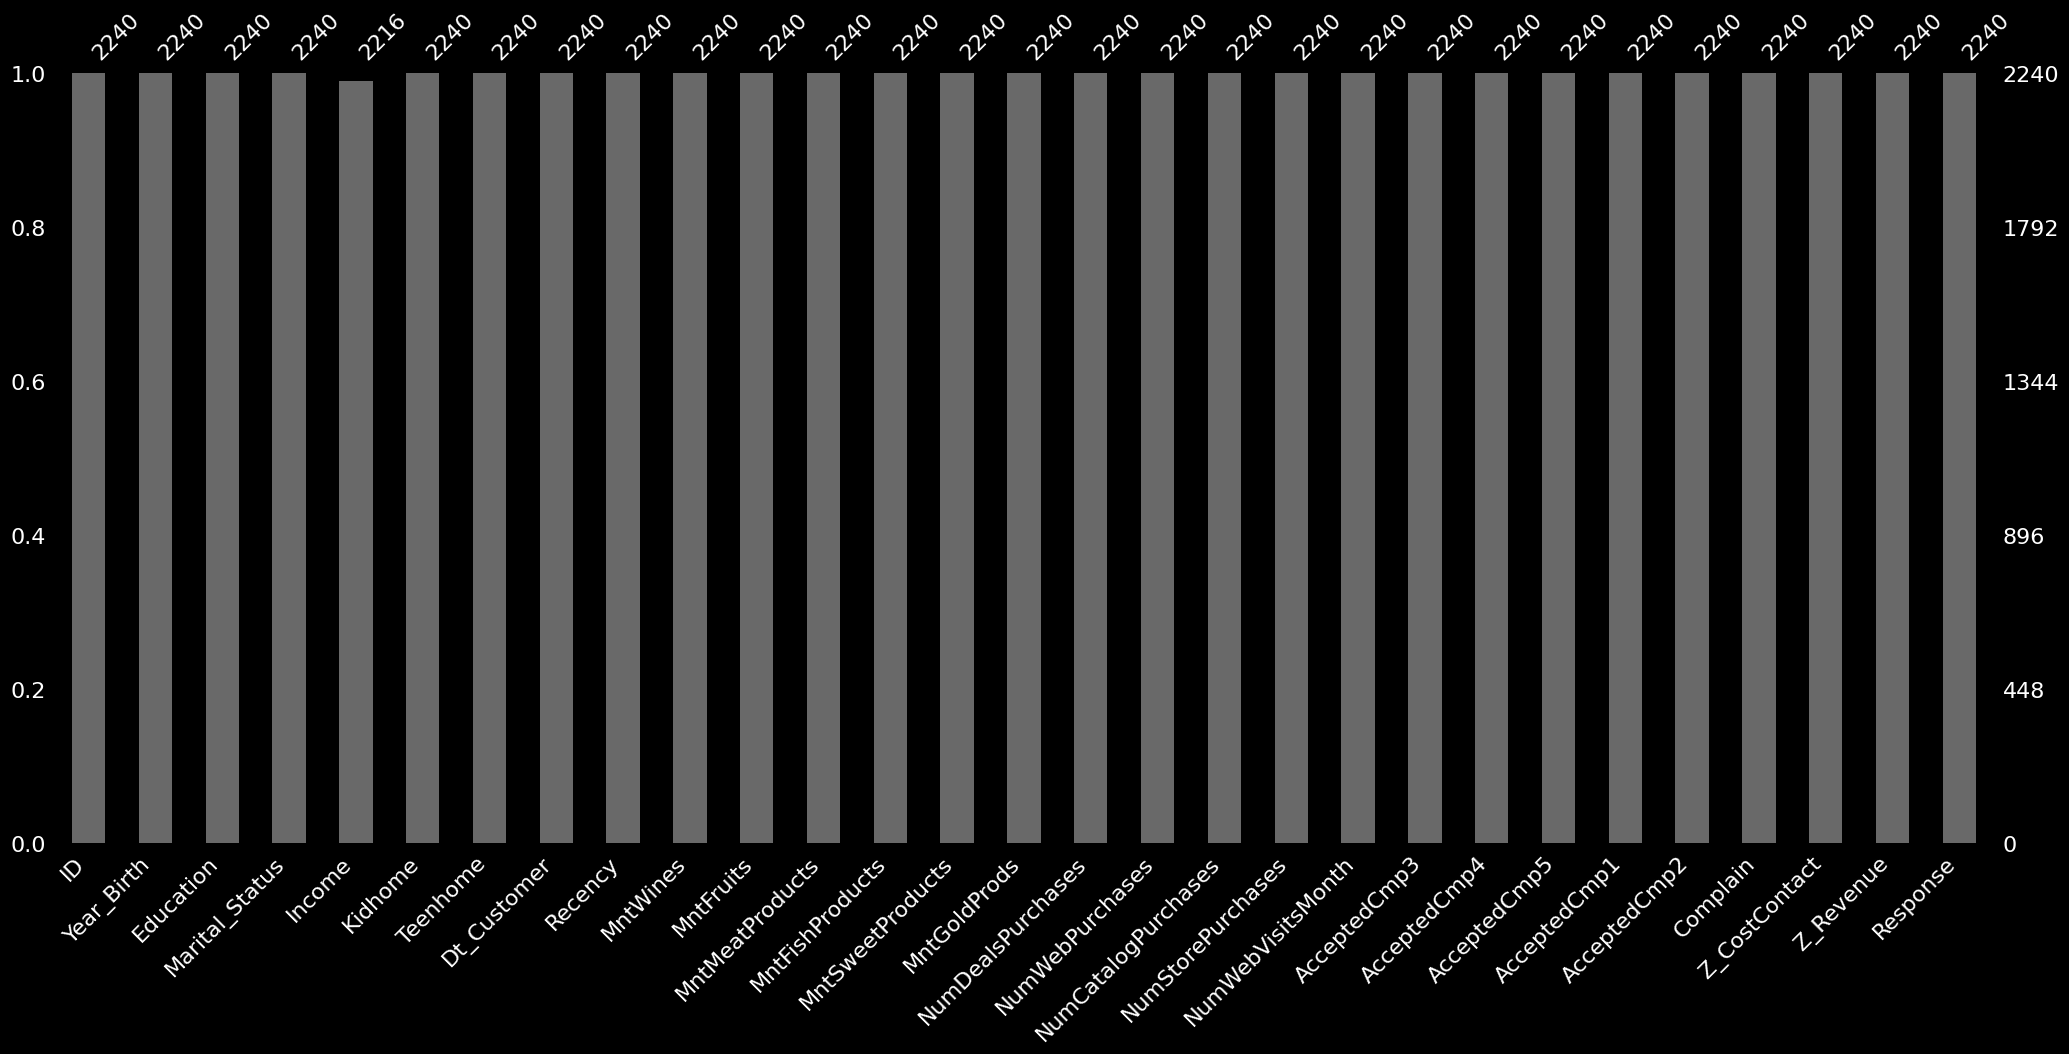

In [ ]:
# visualizing the same
import missingno as msno
msno.bar(df)

**If visualized closely there is a significant difference between the bar of income as compared to other columns**

<Axes: >

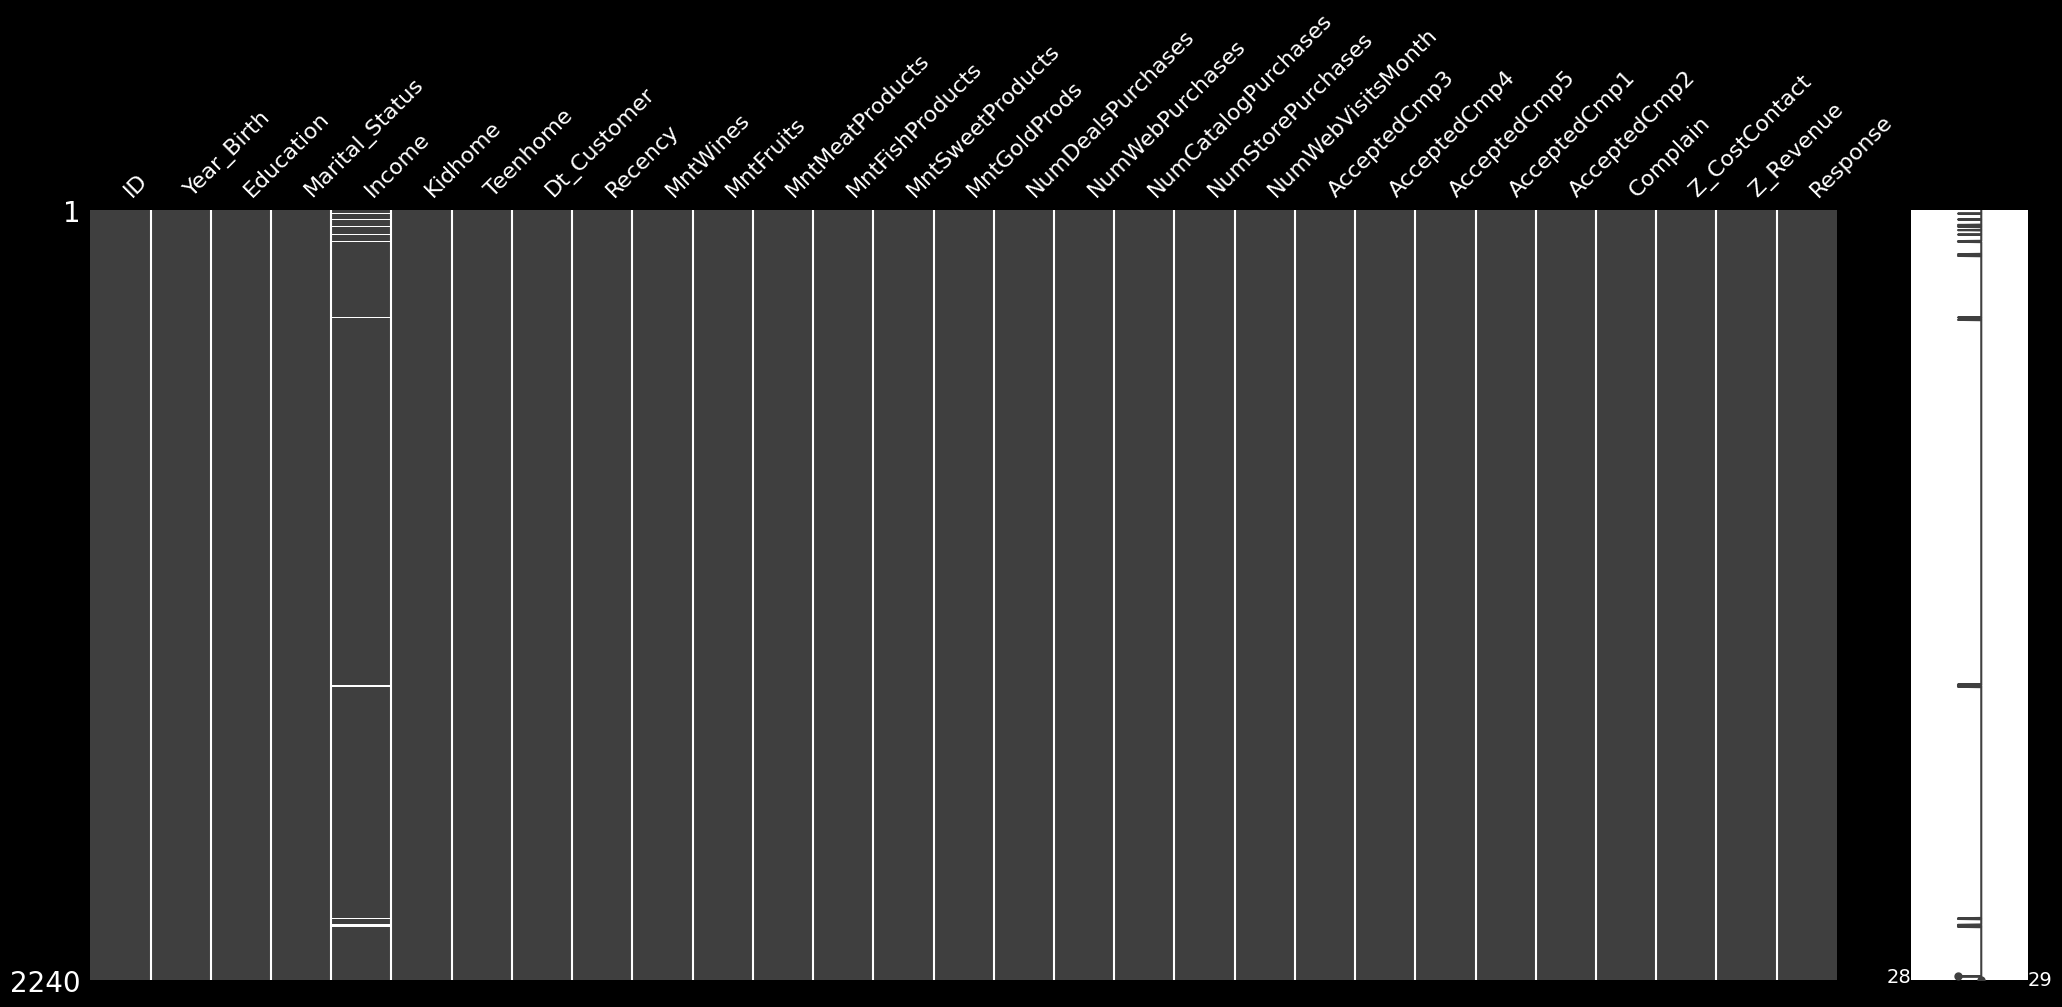

In [ ]:
# if not clear than we can plot the matrix
msno.matrix(df)

**Here it's clearly visible that we are having the null values in the income column**

<hr>

**Questions: What can be done?**

**Solution: See, in the given data there is only column that is having null values, and moreover the number of null values is very less as compared to the entire dataset shape. So we can proceed to drop the data records, as this not significantly affect the overall integrity of data**

<hr>

In [ ]:
df = df.dropna()

**Check for the duplicated values**

In [ ]:
df.duplicated().sum()

0

<hr>

**Outliers Analysis**


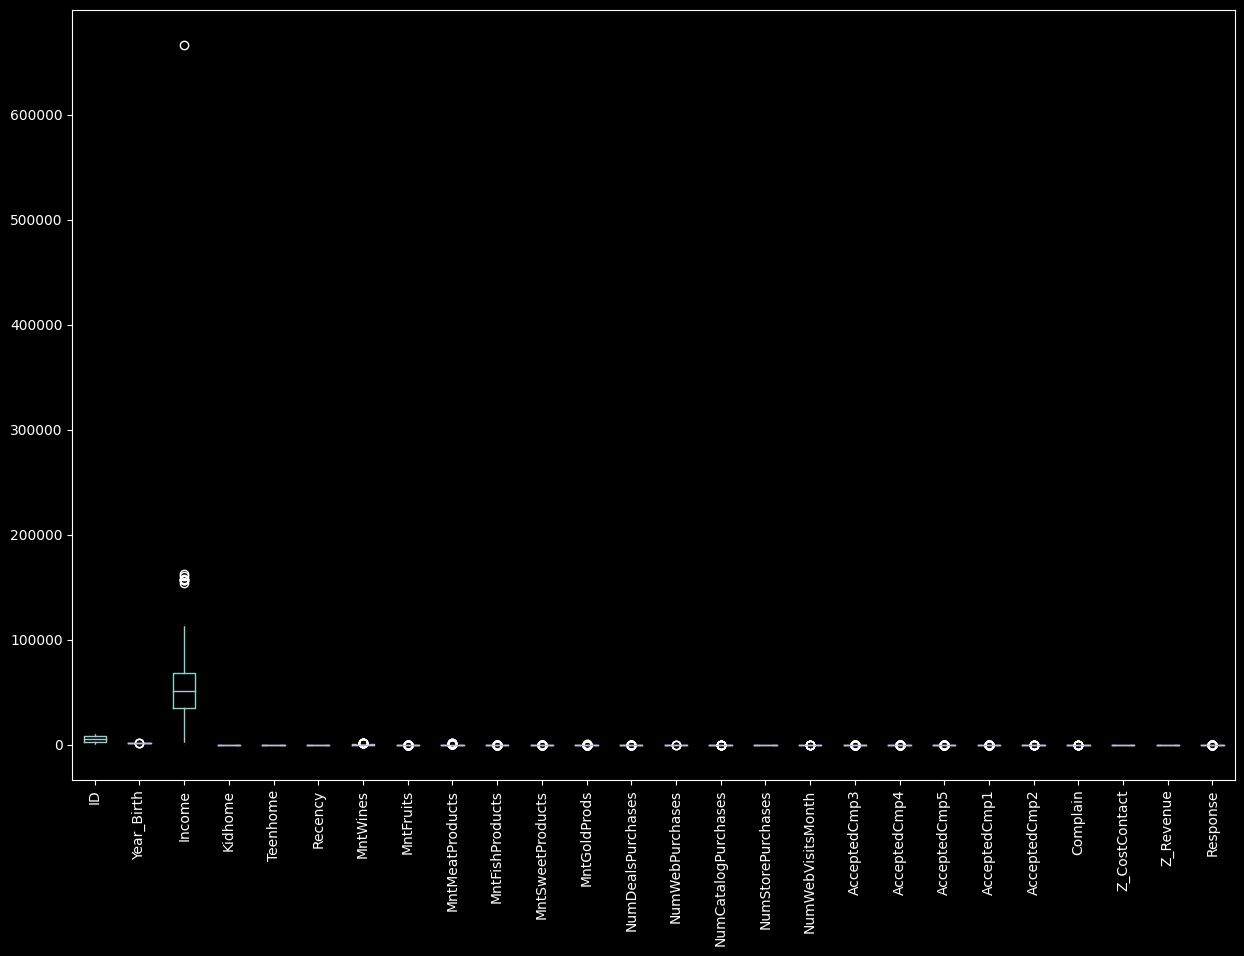

In [ ]:
fig, ax = plt.subplots(figsize = (15, 10))
# ploting for the entire dataset
df.boxplot(ax = ax, grid = False)
plt.xticks(rotation = 90)
plt.show()

**Looking at the plot, can we conclude that in comparison of any other columns, the income columns seems to have the significant outliers in all**

**Hence we can proceed to treating the income columns**

In [ ]:
# code to plot the outliers using plotly
# import pandas as pd
# import plotly.express as px
# for col in df.columns:
#     if df[col].dtype != "object":
#       fig = px.box(df[col])
#       fig.show()

<hr>

**Distribution for the income columns for outliers visualization**

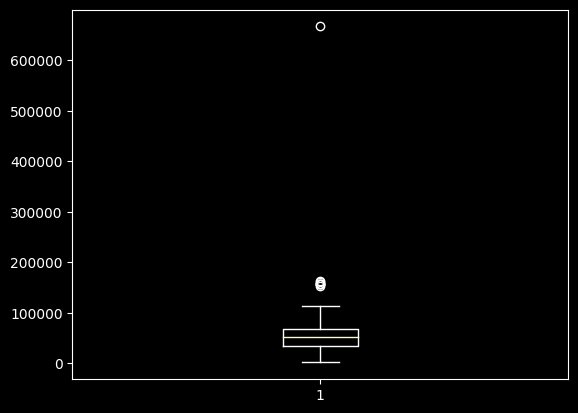

In [ ]:
plt.boxplot(df['Income'])
plt.show()

**Treatment of outliers**

In [ ]:
# determining the Q1 and Q3 to find the IQR
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)

# IQR Calculation
IQR = Q3 - Q1

# Identifying the data that are outliers
outliers = df[(df['Income'] < (Q1 - 1.5*IQR)) | (df['Income'] > (Q3 + 1.5*IQR))]

# printing the data for getting outliers
print('The total number of outliers in the data: ', len(outliers))

The total number of outliers in the data:  8


**Need to remove the data that falls outside the range**

In [ ]:
df = df[~((df['Income'] < (Q1 - 1.5*IQR)) | (df['Income'] > (Q3 + 1.5*IQR)))]

**Updated Shape of the data**

In [ ]:
a = df.shape
print(f'The data is having {a[0]} rows and {a[1]} columns')

The data is having 2208 rows and 29 columns


**Confirming the data is free of outliers**

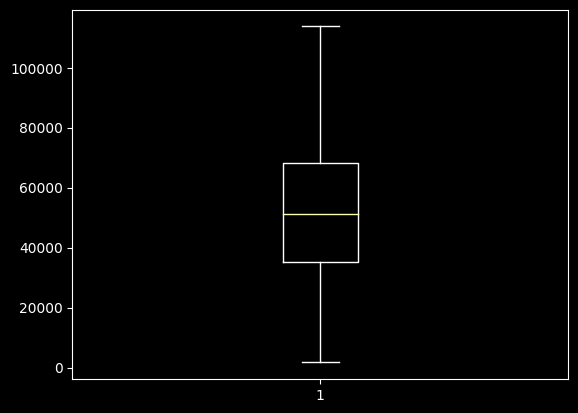

In [ ]:
# check for the confirmation
plt.boxplot(df["Income"])
plt.show()

<hr>

# **Step 5 : Feature Engineering**


**We are going to work on all the feasible data one by one manually, and based on the same we will try to derieve the conclusion**

In [ ]:
# starting with the education colunms
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Here based on the observation we will try to categorize the values into just three categories

  * High: Graduation, PHd, Master
  * Middle: Basic
  * Low: For any other values

In [ ]:
def education_transform(education):
  if education in ['Graduation', 'PhD', 'Master']:
    return 'High'
  elif education in ['Basic']:
    return 'Middle'
  else:
    return 'Low'

In [ ]:
df['Education_Level'] = df['Education'].apply(education_transform)

In [ ]:
df['Education_Level'].unique()

array(['High', 'Middle', 'Low'], dtype=object)

<hr>

**We will do same to the Marital Status columns**

In [ ]:
# then the marital status columns
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

**For the ones who are living single like absurb, yolo and alone we will keep them in category and other in another category**

In [ ]:
def marital_transform(marital_status):
  if marital_status in ['Alone', 'Absurd', 'YOLO']:
    return 'Living Alone'
  else:
    return 'Living with others'

In [ ]:
df['Living_status'] = df['Marital_Status'].apply(marital_transform)

<hr>

**Need to have the age columns, hence we can use the Year_Birth column and we can subtract it from the recent year to get the age of the people**

In [ ]:
df['Age'] = 2024 - df['Year_Birth']

In [ ]:
a = df["Age"].unique()
# age in ascending order
print(np.sort(a))
print('All the unique age available: ', df['Age'].nunique())

[ 28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  83  84 124 125 131]
All the unique age available:  59


<hr>

**Working with Campaign columns, so instead of having multiple campaign we can just club them together in one columns**

In [ ]:
df['Total_Campaign_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2',
                                    'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(axis = 1)

In [ ]:
df['Total_Campaign_Accepted'].value_counts()

0    1749
1     323
2      81
3      44
4      11
Name: Total_Campaign_Accepted, dtype: int64

<hr>

**Similarly, We are going to create a single columnns for all the spending**

In [ ]:
df['Average_Expense'] = (df[['MntWines',
                             'MntFruits',
                             'MntMeatProducts',
                             'MntFishProducts',
                             'MntSweetProducts',
                             'MntGoldProds']].sum(axis = 1))/df['NumDealsPurchases']

<hr>

**Creating a total spent columns that will have all the expenditure**

In [ ]:
df['Spent'] = df['MntWines'] +df['MntFruits'] + df['MntMeatProducts']+ df['MntFishProducts'] + df['MntSweetProducts']+ df['MntGoldProds']

<hr>

**Creating a columns that we will be determining is they are having children or not**

In [ ]:
df['Is_Parent'] = (df['Kidhome'] + df['Teenhome'] > 0).astype(int)

<hr>

**Creating the total_amount column that will helps us in analyzing the total amount spent in 2yrs**

In [ ]:
df['Total_Expense'] = df['MntWines'] +df['MntFruits'] + df['MntMeatProducts']+ df['MntFishProducts'] + df['MntSweetProducts']+ df['MntGoldProds']

<hr>

**Creating the feature that will helps determine the number of visits on average on the companies website**

In [ ]:
df['avg_website_visit'] = df['NumWebVisitsMonth']/12
# since there are 12 months in total

<hr>

**Dropping irrelevant Data**

In [ ]:
dropList = ['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
df = df.drop(dropList, axis = 1)

<hr>

**Data Overview**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education                2208 non-null   object 
 1   Marital_Status           2208 non-null   object 
 2   Income                   2208 non-null   float64
 3   Kidhome                  2208 non-null   int64  
 4   Teenhome                 2208 non-null   int64  
 5   Recency                  2208 non-null   int64  
 6   MntWines                 2208 non-null   int64  
 7   MntFruits                2208 non-null   int64  
 8   MntMeatProducts          2208 non-null   int64  
 9   MntFishProducts          2208 non-null   int64  
 10  MntSweetProducts         2208 non-null   int64  
 11  MntGoldProds             2208 non-null   int64  
 12  NumDealsPurchases        2208 non-null   int64  
 13  NumWebPurchases          2208 non-null   int64  
 14  NumCatalogPurchases     

<hr>

# **Step 6: EDA (Exploratory Data Analysis)**

1. **Distribution of Income**

In [ ]:
import plotly.express as px

In [ ]:
fig = plt.hist(df, x = 'Income', nbins = 50)
fig.show()

TypeError: hist() got multiple values for argument 'x'

**By looking at the distribution we can saay that the data is right skewed**

2. **Analysis on Age**

In [ ]:
fig = px.histogram(df, x = 'Age', nbins = 30, color = 'Age', title = 'Analysis on Age via Distribution')
fig.show()

**3. Analysis on Marital Status**

In [ ]:
fig = px.histogram(df, x = 'Marital_Status', nbins = 5, title = 'Marital Status Analysis')
fig.show()

Insights
  * Most of the people are married
  * The population of people who are living single is very less (Absurd, YOLO, alone)

4. **Education Level Analysis**

In [ ]:
fig = px.histogram(df, x = 'Education_Level', nbins = 5, title = 'Education Level Analysis')
fig.show()

* **Most of the people are having higher level education, means the population is educated. So from here we can also say that since the population is educated so it's obvious that the salary should be fairly good**

**5. Average expense of according to the living status**

In [ ]:
condition_df = df.groupby(['Marital_Status'])['Average_Expense'].mean().reset_index()

In [ ]:
condition_df

,Marital_Status,Average_Expense
0,Absurd,802.833333
1,Alone,57.716667
2,Divorced,NaN
3,Married,NaN
4,Single,NaN
5,Together,NaN
6,Widow,NaN
7,YOLO,84.800000


In [ ]:
# visualize
fig = px.bar(condition_df, x = 'Marital_Status', y = 'Average_Expense', color = 'Marital_Status')
fig.show()

**The highest expense are for those whose style of living is absurd (bachelors)**

**6. Analysis on Average Expense by Education Level**

In [ ]:
condition_plot = df.groupby(['Education_Level'])['Average_Expense'].mean().reset_index()
condition_plot

,Education_Level,Average_Expense
0,High,NaN
1,Low,NaN
2,Middle,47.008025


In [ ]:
fig = px.bar(condition_plot, x = 'Education_Level', y = "Average_Expense", color = 'Education_Level')
fig.show()

**7. Distribution for kids**

In [ ]:
fig = px.histogram(df, x = 'Kidhome')
fig.show()

* **Maximum people are having no children, some of them are having 1 and some are having more than 2**

**8. The distribution for number of teenager in household**

In [ ]:
fig = px.histogram(df, x = 'Teenhome')
fig.show()

**9. Analysis on Total Campaigns Accepted**

In [ ]:
fig = px.histogram(df, x = 'Total_Campaign_Accepted', nbins = 20, title = 'Total Campaign Accepted Distribution')
fig.show()

**10. Average Spend Per Purchase**

In [ ]:
fig = px.histogram(df, x = 'Average_Expense', nbins = 20, title = 'Average Spend on Purchase')
fig.show()

**12. Relationship between NumWebPurchases vs NumWebVisitsMonth**

In [ ]:
fig = px.scatter(df, x= 'NumWebPurchases', y = 'NumWebVisitsMonth')
fig.show()

**With reference we can say that people who visit website most of the time, are not the buyers, to one who are in range of 10 - 15 web visit, are also the one who are purchasing more**

**13. Relationshop Amount of wines with amount of Sweet Products with Income columns**

In [ ]:
fig = px.scatter(df, x = 'MntWines', y = 'MntSweetProducts', size = 'NumWebVisitsMonth', color = 'Income', size_max = 50)
fig.show()

<hr>

# **Step 7: Clustering**

**1. Feature Encoding using One Hot Encoding**

In [ ]:
cat_col = df.select_dtypes(include = 'object').columns
cat_col

Index(['Education', 'Marital_Status', 'Education_Level', 'Living_status'], dtype='object')

In [ ]:
# implementing on the one hot encoding using dummies
df = pd.get_dummies(df, columns = ['Education', 'Marital_Status', 'Education_Level', 'Living_status'])
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_Level_High,Education_Level_Low,Education_Level_Middle,Living_status_Living Alone,Living_status_Living with others
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,1,0,0,0,1,0,0,0,1
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,1,0,0,0,1,0,0,0,1
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,1,0,0,0,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,1,0,0,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,1,0,0,0,0,1,0,0,0,1
2236,64014.0,2,1,56,406,0,30,0,0,8,...,0,0,1,0,0,1,0,0,0,1
2237,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,0,1,0,0,0,1
2238,69245.0,0,1,8,428,30,214,80,30,61,...,0,0,1,0,0,1,0,0,0,1


**2. Feature Scaling using Standard Scaler**

In [ ]:
from sklearn.preprocessing import StandardScaler

num_Cols = []

for i in df.columns:
  if ((df[i].dtype == 'int64')| (df[i].dtype == 'float64')):
    num_Cols.append(i)
num_Cols
# since this is having infinite values hence we are not considereing the same

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'Age',
 'Total_Campaign_Accepted',
 'Average_Expense',
 'Spent',
 'Is_Parent',
 'Total_Expense',
 'avg_website_visit']

In [ ]:
sc = StandardScaler()

consider_cols = ['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'Age',
 'Total_Campaign_Accepted',
 'Spent',
 'Is_Parent',
 'Total_Expense',
 'avg_website_visit']

df[consider_cols] = sc.fit_transform(df[consider_cols])

This columns has been dropped since we are done with this columns and moreover it has infinity ambuiguity

In [ ]:
df = df.drop('Average_Expense', axis = 1)

**PCA Implementation: Since the size of the data is quite big as per the columns, so we can implement the PCA on to over here so that we can reduce the size of the data and can work on the same.**

**For general instance we are going with 9 components to keep the thing clear**

In [ ]:
from sklearn.decomposition import PCA
# implementation
# assumption either we can go with variance required, or n_components
pca = PCA(n_components = 9)
df_pca = pca.fit_transform(df)

<hr>

**Determining the clusters using the silhouette scores**

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings as wr
wr.filterwarnings('ignore')

clusters = list(range(2, 10))
silhouette_scores = []
for k in clusters:
    model = KMeans(n_clusters=k)
    preds = model.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, preds))
    print(f'For i = {k}, the silhouette_scores is {silhouette_score(df_pca, preds)}')

best_cluster_val = clusters[np.argmax(silhouette_scores)]
print(f'The best values for the cluster is {best_cluster_val}')

For i = 2, the silhouette_scores is 0.35947558227926873
For i = 3, the silhouette_scores is 0.28124390201043253
For i = 4, the silhouette_scores is 0.2848397562508994
For i = 5, the silhouette_scores is 0.29461610826876083
For i = 6, the silhouette_scores is 0.2910203012625988
For i = 7, the silhouette_scores is 0.19648131075817843
For i = 8, the silhouette_scores is 0.22156072785588446
For i = 9, the silhouette_scores is 0.20613001192192298
The best values for the cluster is 2


<hr>

# **Implementation of KMeans**

In [ ]:
# fitting the data into the model
model = KMeans(n_clusters = 2)
model.fit(df_pca)

KMeans(n_clusters=2)

In [ ]:
# getting the predictions
pred = model.predict(df_pca)

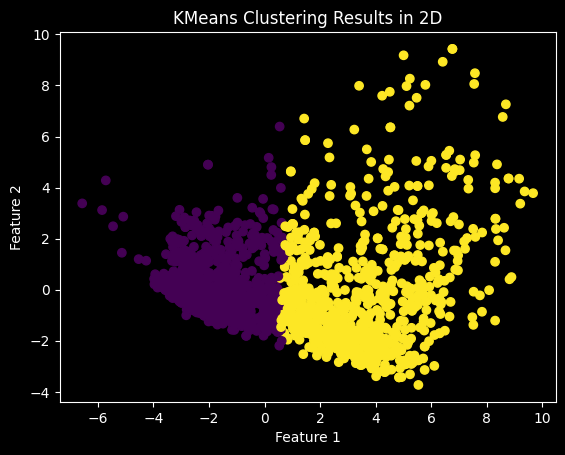

In [ ]:
# Visualize the results in 2D
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=pred, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering Results in 2D')
plt.show()

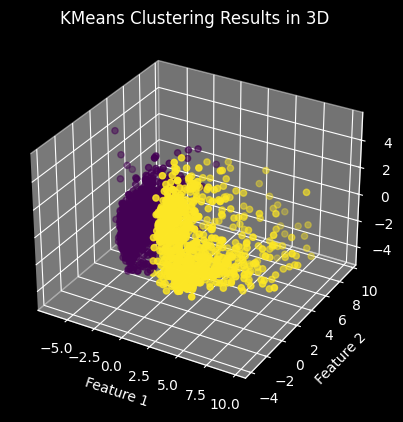

In [ ]:
# Visualize the results in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=pred, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('KMeans Clustering Results in 3D')
plt.show()

<hr>

# **Agglomerative Clustering**

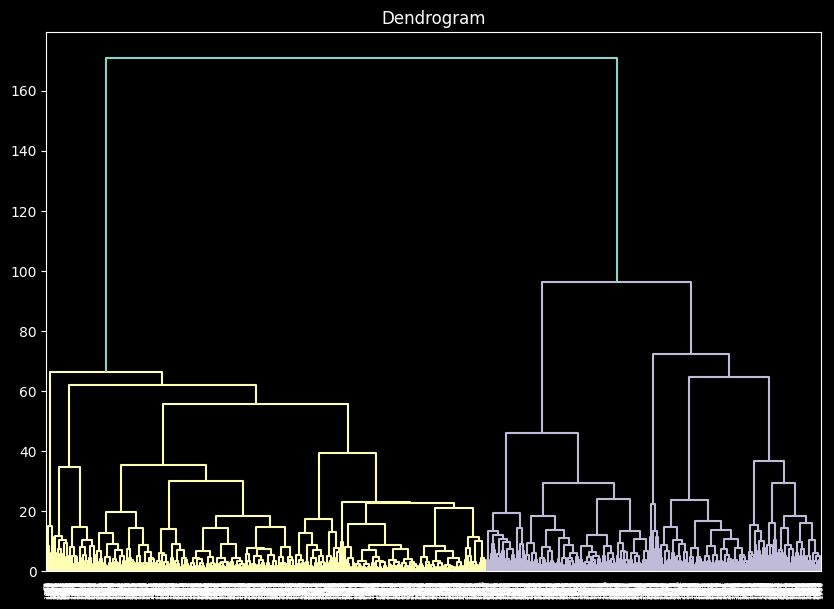

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
# plotting a dendrogram
plt.figure(figsize = (10, 7))
plt.title('Dendrogram')
link = linkage(df_pca, method = 'ward', metric = 'euclidean')
dend = dendrogram(link)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clusters = AgglomerativeClustering(n_clusters = 2, linkage = 'ward', affinity = 'euclidean')
clusters.fit_predict(df_pca)

array([0, 1, 0, ..., 0, 0, 1])

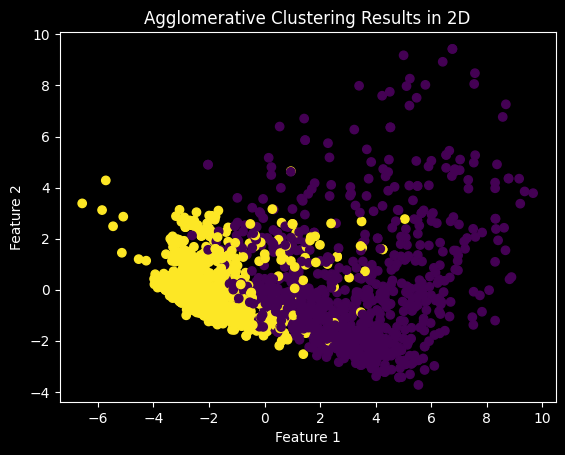

In [ ]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters.labels_, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Agglomerative Clustering Results in 2D')
plt.show()


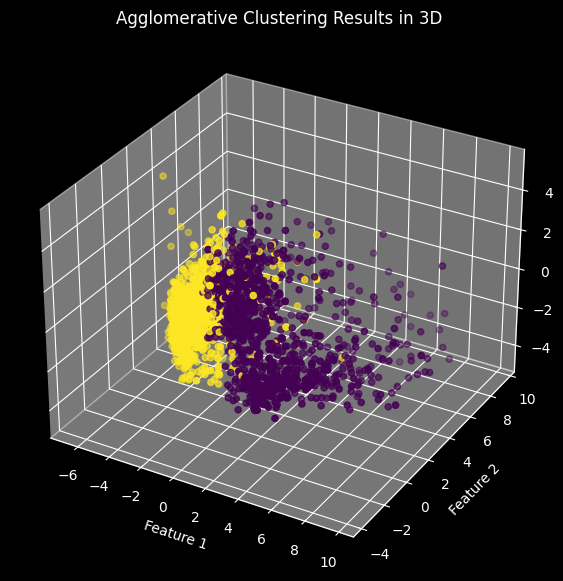

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=clusters.labels_, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Agglomerative Clustering Results in 3D')
plt.show()
